<center><img src = "https://www.archpaper.com/wp-content/uploads/2021/09/Seward-8-1280x859.jpg"></center>

<center><h1>︻╦╤─ Terrorist Attacks 1970 - 2017  ─╦╤︻</h1></center>

# Installing Packages

In [1]:
!pip install tqdm
!pip install --upgrade matplotlib
!pip install basemap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 863.3/863.3 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 219.6/219.6 kB 12.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 19.0 MB/s eta 0:00:00
  Created wheel for pyshp: filename=pyshp-2.1.3-py3-none-any.whl size=37324 sha256=e36e0a007f73819b3eafba89adc99204055cb79ed88645700197b7117266735e
  Stored in directory: /root/.cache/pip/wheels/43/f8/87/53c8cd41545ba20e536ea29a8fcb5431b5f477ca50d5dffbbe
Successfully built pyshp
  Attempting uninstall: pyshp
    Found existing installation: pyshp 2.3.0
    Uninstalling pyshp-2.3.0:
      Successfully uninstalled pyshp-2.3.0


# Loading Libraries

In [2]:
print("Loading...")

# HTML Display
from IPython.display import HTML

# disabling warnings
import warnings

# pandas and numpy
import pandas as pd
import numpy as np

# other
import string
import math
import codecs
import time
import io
import base64

# data viz
import missingno as msno
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.patches as mpatches
from matplotlib import pyplot as plt
from matplotlib import animation,rc
from tqdm import tqdm
from tqdm.notebook import tqdm_notebook
from termcolor import colored
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from mpl_toolkits.basemap import Basemap

# nltk
import nltk

print("Done")

Loading...
Done


In [3]:
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
sns.set_theme(style="whitegrid")
%matplotlib inline

main_accent_colour = "#b366ff"
main_palette = ["#FBE5C0", "#DD9A30", "#F88379", "#FF6FC2", "purple", "#D086F6", "#B0D2C2", "#4C5D70", "#6FA2CE", "#382D24", "#3ACF3A", "#7D7D00"]

def generate_palette(data, col, vals_list, accent_colour="#b366ff", dim_colour="darkgrey") :
    palette = {c: dim_colour if c not in vals_list else accent_colour for c in data[col].unique()}
    return palette

# Reading the data

In [4]:
terror_df = pd.read_csv("../input/gtd/globalterrorismdb_0718dist.csv", encoding='ISO-8859-1')
terror_df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN

# EDA and Visualizations

## WordCloud

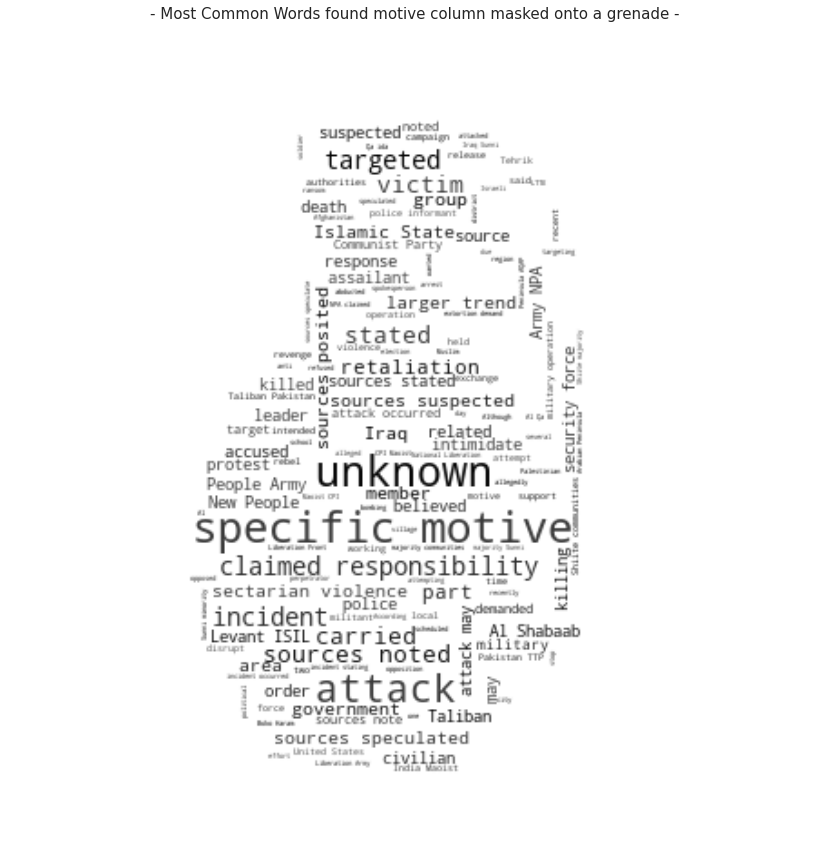

In [5]:
terror_df.drop(terror_df[(terror_df.motive == "Unknown") & (terror_df.motive == 0)].index, inplace=True)

def similar_color_func(word=None, font_size=None,
                       position=None, orientation=None,
                       font_path=None, random_state=None):
    '''Creates a custom function for the color of the wordcloud.'''
    
    h = 0 # 0 - 360 <- the color hue
    s = 0 # 0-100 <- the color saturation
    l = random_state.randint(0, 30) # 0 - 100 <- gradient
    
    return "hsl({}, {}%, {}%)".format(h, s, l)

## Get descriptions and convert them to a string
text = terror_df.motive.dropna().unique()
text = " ".join(text)

# Get the mask - the form of the wordcloud
mask = np.array(Image.open('../input/maskiiiii/139635253-a-hand-grenade-is-green-on-a-white-isolated-background-vector-image-eps-10.jpg'))

# Create wordcloud object
wc = WordCloud(mask=mask, background_color="white",
               stopwords=STOPWORDS, max_font_size=256,
               random_state=42, width=mask.shape[1],
               height=mask.shape[0],
               color_func=similar_color_func)
wc.generate(text)

# Plot
fig = plt.figure(figsize=(15, 15))
plt.title("- Most Common Words found motive column masked onto a grenade -",
           size=15)
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

## Some basic info

In [6]:
terror_df = terror_df.fillna(0)
print('Country with Highest Terrorist Attacks:',terror_df['country'].value_counts().index[0])
print('Regions with Highest Terrorist Attacks:',terror_df['region'].value_counts().index[0])
print('Maximum people killed in an attack are:',int(terror_df['nkill'].max()),'that took place in',terror_df.loc[terror_df['nkill'].idxmax()].country_txt, "in the year", terror_df.loc[terror_df['nkill'].idxmax()].iyear)

Country with Highest Terrorist Attacks: 95
Regions with Highest Terrorist Attacks: 10
Maximum people killed in an attack are: 1570 that took place in Iraq in the year 2014


# Terrorist Activities Each Year (1970 - 2017)

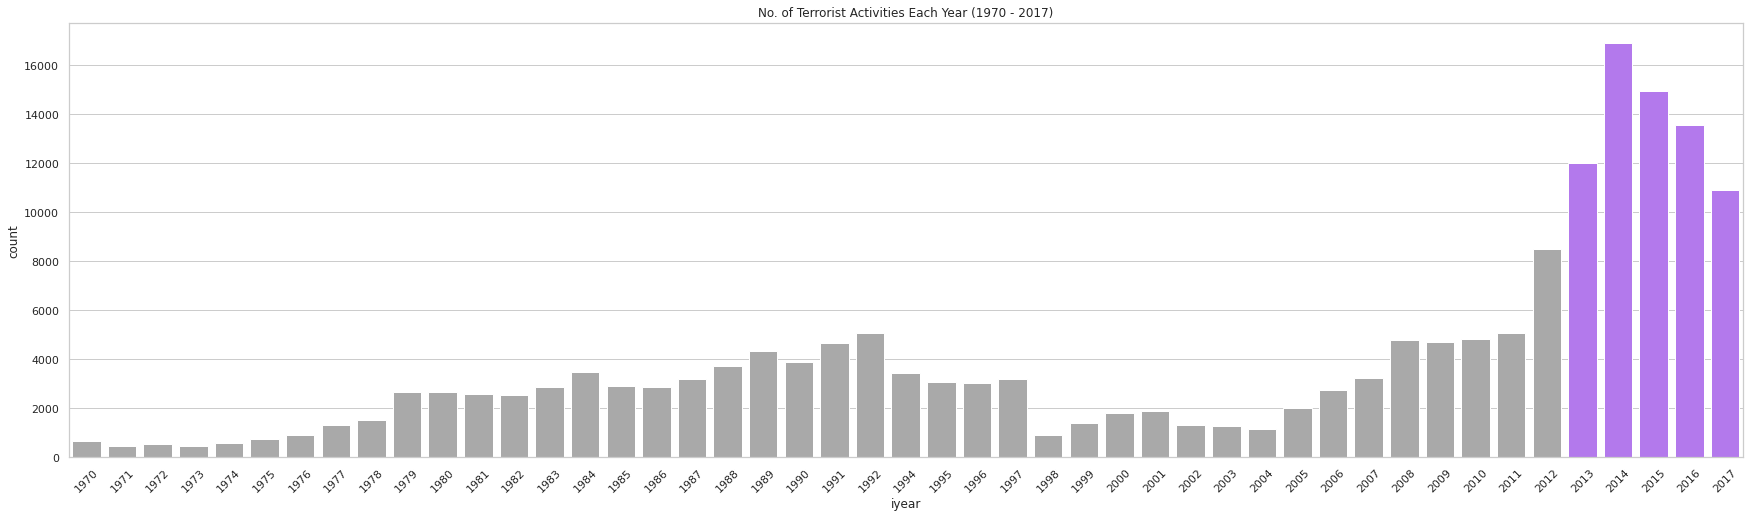

In [7]:
vals = [i for i in range(2013, 2018)]
palette = generate_palette(data=terror_df, col="iyear", vals_list=vals)

plt.figure(figsize=(30,8))

ax = sns.countplot(data=terror_df, 
                   x = "iyear", 
                   palette = palette
)

ax.set(title='No. of Terrorist Activities Each Year (1970 - 2017)')

plt.xticks(rotation=45)

plt.show()

## Total Killings Each Each Year (1970 - 2017)

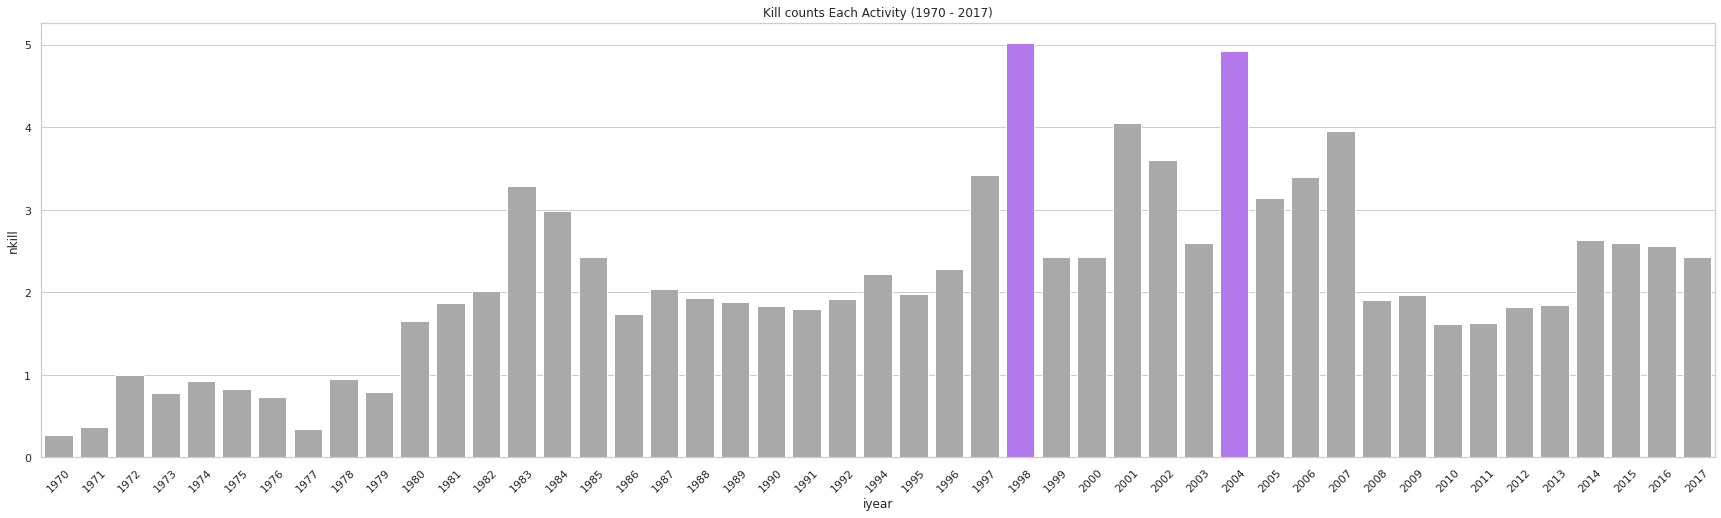

In [8]:
vals = [1998, 2004]
palette = generate_palette(data=terror_df, col="iyear", vals_list=vals)

plt.figure(figsize=(30,8))

ax = sns.barplot(data=terror_df, x="iyear", y="nkill", palette=palette, ci=None)

ax.set(title='Kill counts Each Activity (1970 - 2017)')

plt.xticks(rotation=45)

plt.show()

## Region

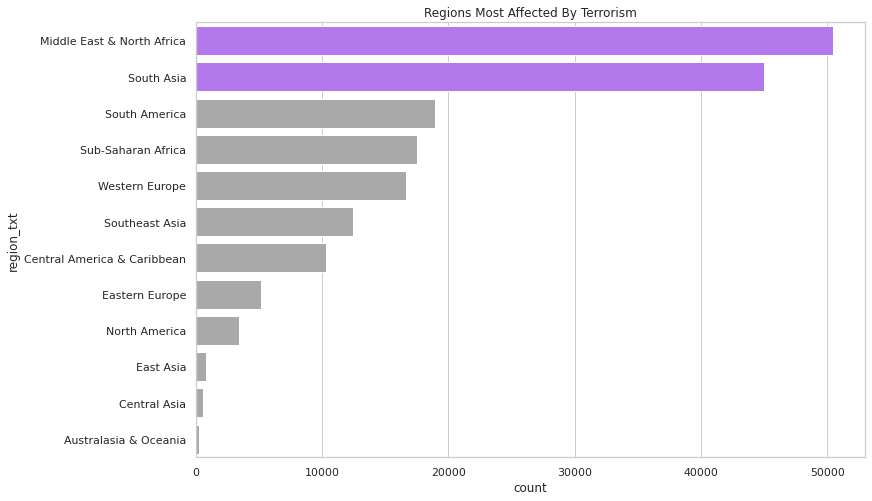

In [9]:
vals = ["Middle East & North Africa", "South Asia"]
palette = generate_palette(data=terror_df, col="region_txt", vals_list=vals)

plt.figure(figsize=(12,8))

ax = sns.countplot(data=terror_df,
              y="region_txt",
              palette=palette,
              order=terror_df['region_txt'].value_counts().index
).set(title='Regions Most Affected By Terrorism')

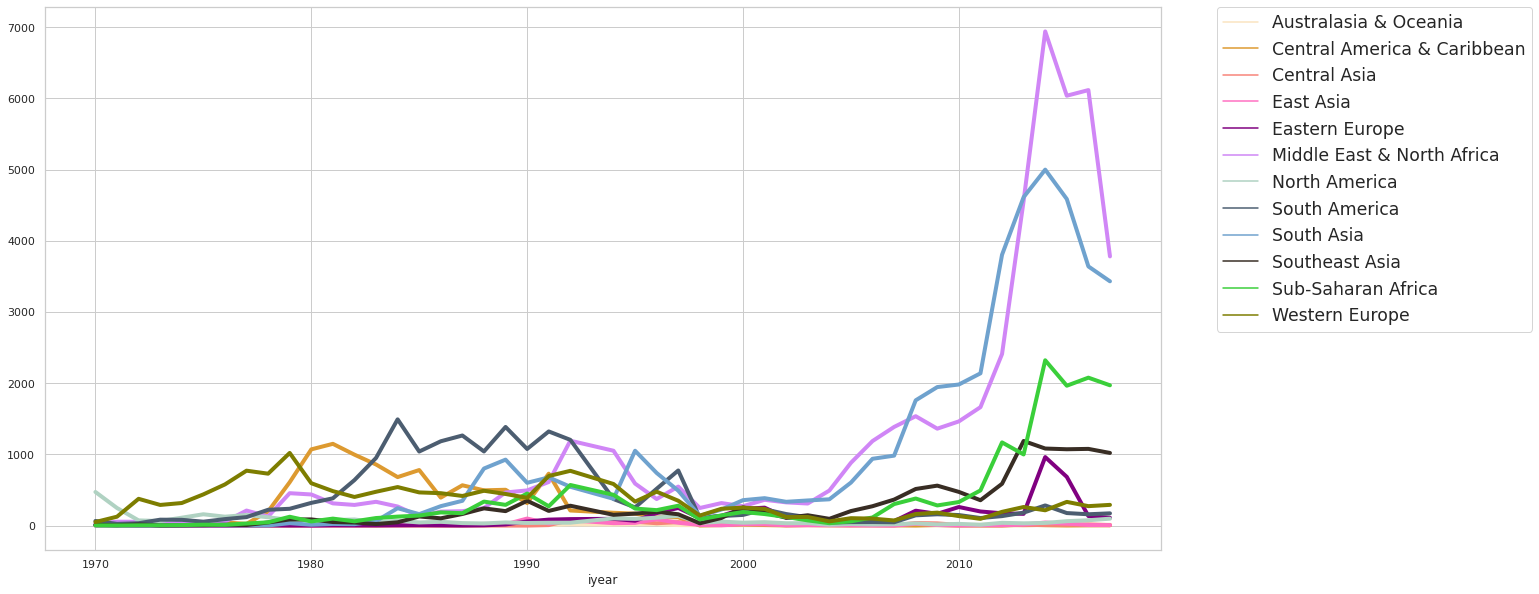

In [10]:
terror_year_region = pd.crosstab(terror_df.iyear,terror_df.region_txt)
plt.figure(figsize=(20,10))
sns.lineplot(data=terror_year_region, dashes=False, linewidth=4, legend=True, palette=main_palette)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize="xx-large")

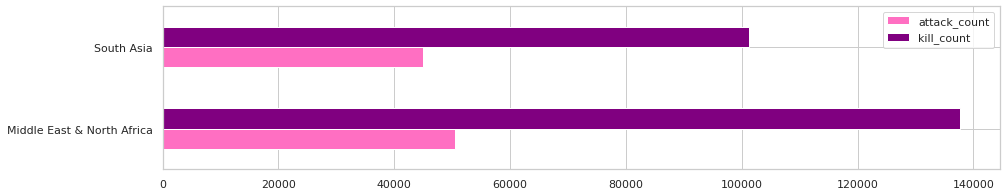

In [11]:
terror_attacktype_region = pd.crosstab(terror_df.region_txt,terror_df.attacktype1_txt)
t_regions = terror_df[terror_df.region_txt.isin(terror_df.region_txt.value_counts().head(2).index)]
attack_count_region = t_regions.region_txt.value_counts()
kill_count_region = t_regions.groupby("region_txt").nkill.sum()
a_k_region = pd.DataFrame({"attack_count" : attack_count_region, "kill_count" : kill_count_region})

a_k_region.plot.barh(color=main_palette[3:5])
fig=plt.gcf()
fig.set_size_inches(15, 3)

## Country

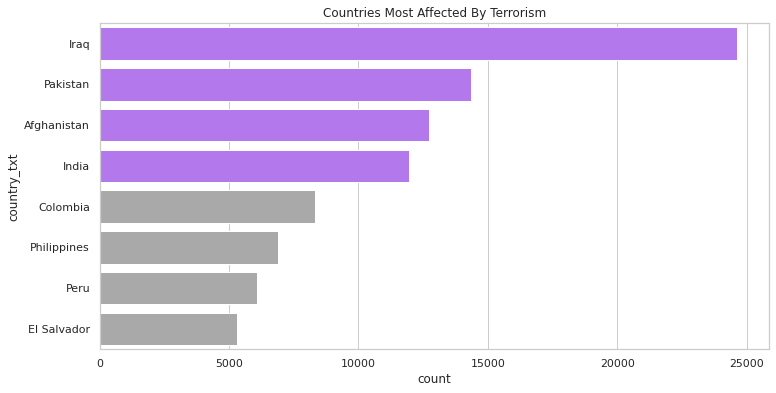

In [12]:
countries_df = terror_df[terror_df.country_txt.isin(terror_df['country_txt'].value_counts().head(8).index)]

vals = ["Iraq", "Pakistan", "Afghanistan", "India"]
palette = generate_palette(data=countries_df, col="country_txt", vals_list=vals)

plt.figure(figsize=(12,6))

ax = sns.countplot(data=countries_df,
              y="country_txt",
              palette=palette,
              order=countries_df['country_txt'].value_counts().index
).set(title='Countries Most Affected By Terrorism')

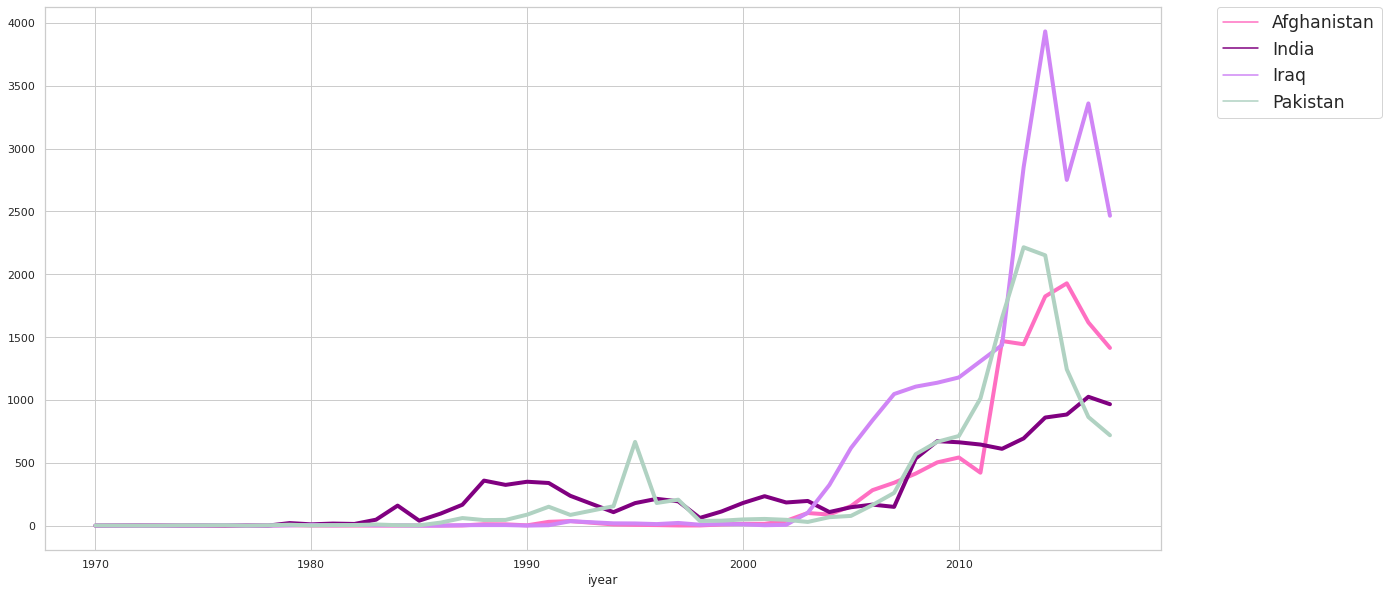

In [13]:
terror_year_country = pd.crosstab(terror_df[terror_df.country_txt.isin(terror_df.country_txt.value_counts().head(4).index)].iyear,terror_df[terror_df.country_txt.isin(terror_df.country_txt.value_counts().head(4).index)].country_txt)
plt.figure(figsize=(20,10))
sns.lineplot(data=terror_year_country, dashes=False, linewidth=4, legend=True, palette=main_palette[3:7])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize="xx-large")

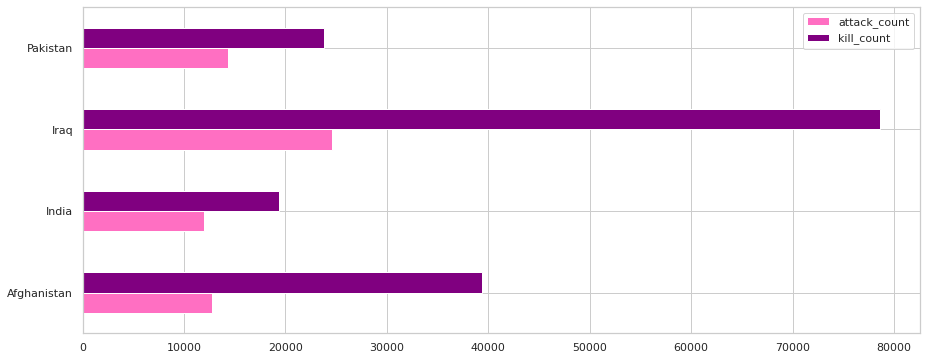

In [14]:
terror_attacktype_region = pd.crosstab(terror_df.region_txt,terror_df.attacktype1_txt)
t_countries = terror_df[terror_df.country_txt.isin(terror_df.country_txt.value_counts().head(4).index)]
attack_count = t_countries.country_txt.value_counts()
kill_count = t_countries.groupby("country_txt").nkill.sum()
a_k = pd.DataFrame({"attack_count" : attack_count, "kill_count" : kill_count})

a_k.plot.barh(color=main_palette[3:5])
fig=plt.gcf()
fig.set_size_inches(15, 6)

## Terrorist Groups

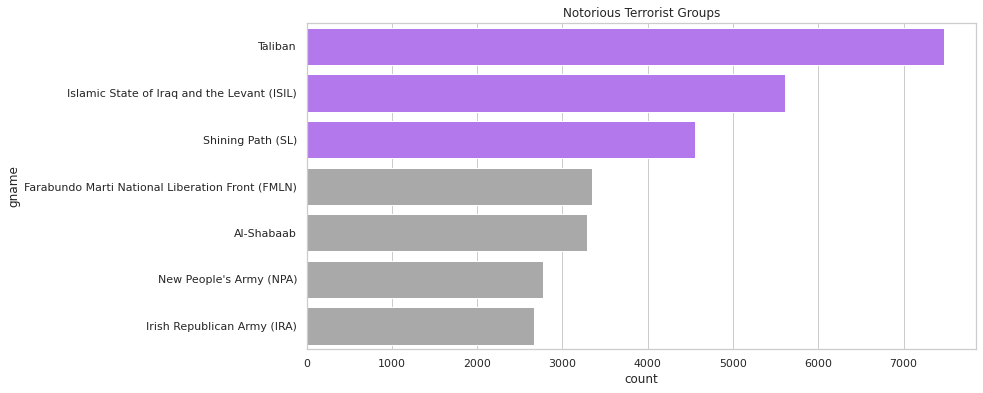

In [15]:
groups_df = terror_df[terror_df.gname.isin(terror_df['gname'].value_counts().head(8).index)]
groups_df.drop(groups_df[groups_df.gname == "Unknown"].index, inplace=True)

vals = ["Taliban", "Islamic State of Iraq and the Levant (ISIL)", "Shining Path (SL)"]
palette = generate_palette(data=groups_df, col="gname", vals_list=vals)

plt.figure(figsize=(12,6))

ax = sns.countplot(data=groups_df,
              y="gname",
              palette=palette,
              order=groups_df['gname'].value_counts().index
).set(title='Notorious Terrorist Groups')

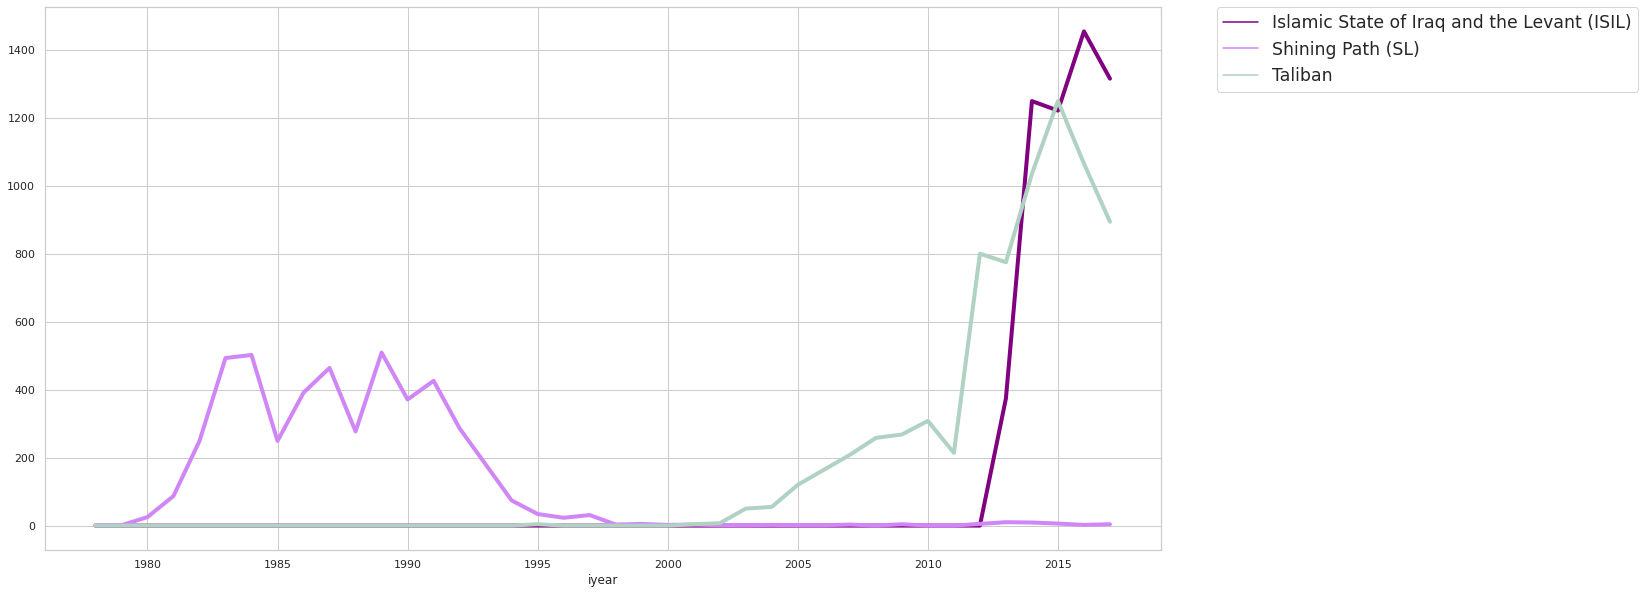

In [16]:
terror_year_group = pd.crosstab(terror_df.drop(terror_df[terror_df.gname == "Unknown"].index)[terror_df.drop(terror_df[terror_df.gname == "Unknown"].index).gname.isin(terror_df.drop(terror_df[terror_df.gname == "Unknown"].index).gname.value_counts().head(3).index)].iyear,terror_df.drop(terror_df[terror_df.gname == "Unknown"].index)[terror_df.drop(terror_df[terror_df.gname == "Unknown"].index).gname.isin(terror_df.drop(terror_df[terror_df.gname == "Unknown"].index).gname.value_counts().head(3).index)].gname)
plt.figure(figsize=(20,10))
sns.lineplot(data=terror_year_group, dashes=False, linewidth=4, legend=True, palette=main_palette[4:7])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize="xx-large")

## Attack Type

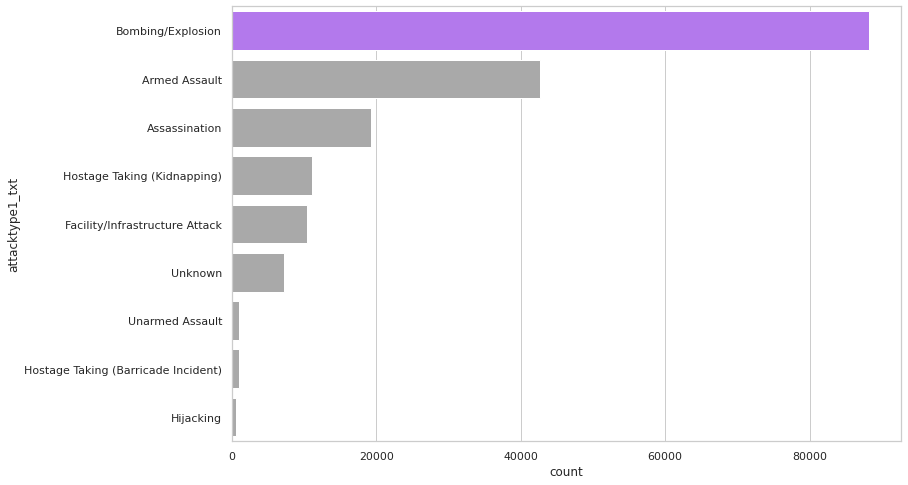

In [17]:
vals = ["Bombing/Explosion"]
palette = generate_palette(data=terror_df, col="attacktype1_txt", vals_list=vals)

plt.figure(figsize=(12,8))

ax = sns.countplot(data=terror_df, 
              y='attacktype1_txt', 
              palette=palette, 
              order=terror_df['attacktype1_txt'].value_counts().index
)

plt.show()

### Region vs Attack Type

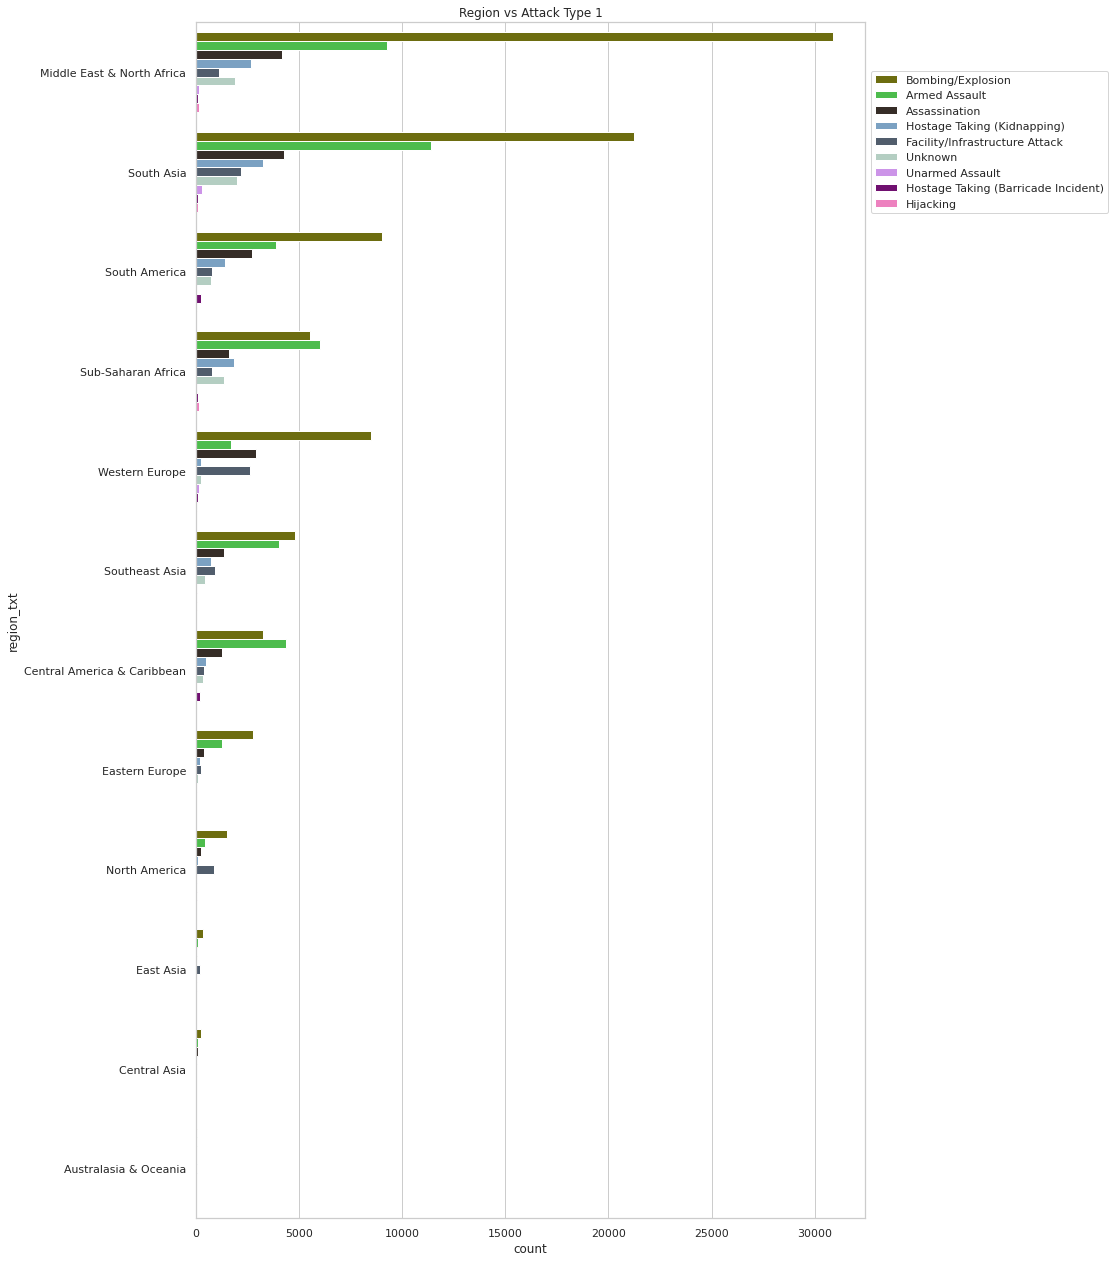

In [18]:
plt.figure(figsize=(12, 22))

ax = sns.countplot(data=terror_df, 
                   y="region_txt", 
                   hue="attacktype1_txt",
                   palette = main_palette[::-1],
                   order=terror_df['region_txt'].value_counts().index,
                   hue_order=terror_df['attacktype1_txt'].value_counts().index
).set(title='Region vs Attack Type 1')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.9))

plt.show()

### Country vs Attack Type

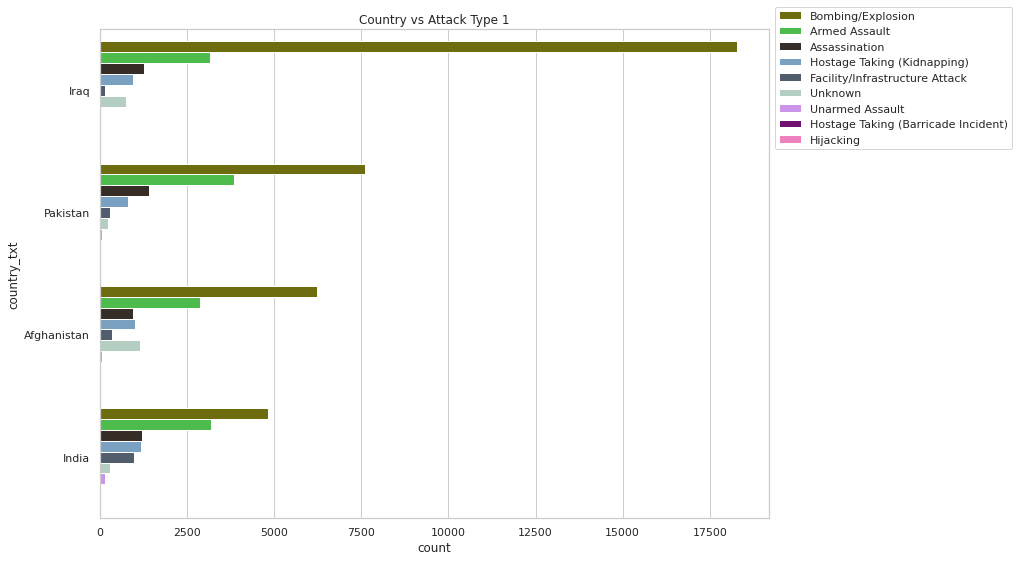

In [19]:
plt.figure(figsize=(12, 9))

ax = sns.countplot(data=terror_df[terror_df.country_txt.isin(terror_df.country_txt.value_counts().head(4).index)], 
                   y="country_txt", 
                   hue="attacktype1_txt",
                   palette = main_palette[::-1],
                   order=terror_df['country_txt'].value_counts().head(4).index,
                   hue_order=terror_df['attacktype1_txt'].value_counts().index
).set(title='Country vs Attack Type 1')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.9))

plt.show()

### Terrorists vs Attack Type

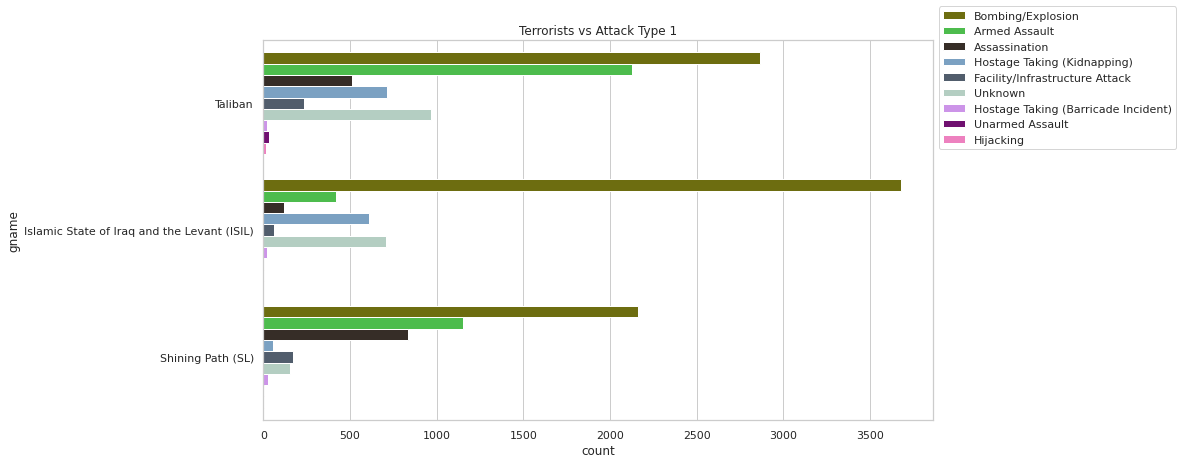

In [20]:
plt.figure(figsize=(12, 7))

ax = sns.countplot(data=terror_df.drop(terror_df[terror_df.gname == "Unknown"].index)[terror_df.drop(terror_df[terror_df.gname == "Unknown"].index).gname.isin(terror_df.drop(terror_df[terror_df.gname == "Unknown"].index).gname.value_counts().head(3).index)], 
                   y="gname", 
                   hue="attacktype1_txt",
                   palette = main_palette[::-1],
                   order=terror_df.drop(terror_df[terror_df.gname == "Unknown"].index)['gname'].value_counts().head(3).index,
                   hue_order=terror_df.drop(terror_df[terror_df.gname == "Unknown"].index)['attacktype1_txt'].value_counts().index
).set(title='Terrorists vs Attack Type 1')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.9))

plt.show()

## Target

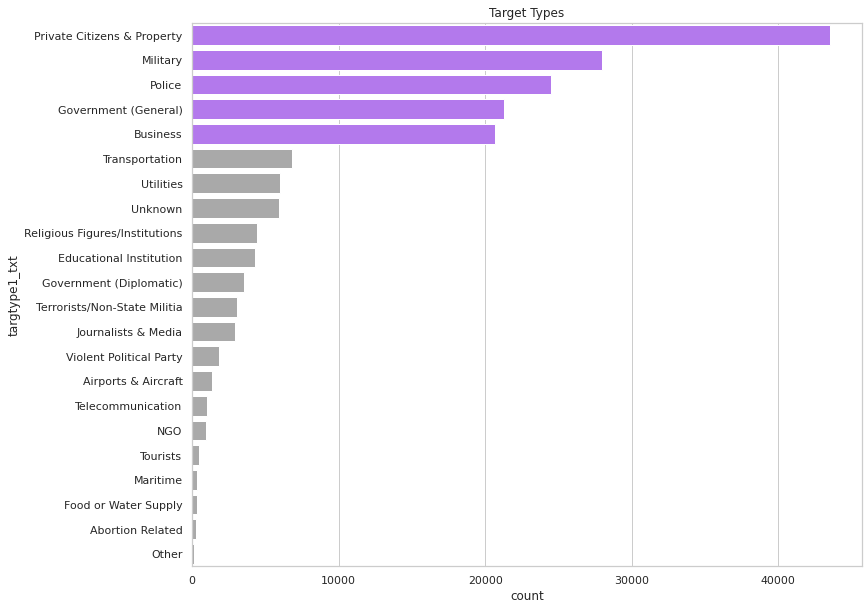

In [21]:
vals = ["Private Citizens & Property", "Military", "Police", "Government (General)", "Business"]
palette = generate_palette(data=terror_df, col="targtype1_txt", vals_list=vals)

plt.figure(figsize=(12,10))

ax = sns.countplot(data=terror_df,
              y="targtype1_txt",
              palette=palette,
              order=terror_df['targtype1_txt'].value_counts().index
).set(title='Target Types')

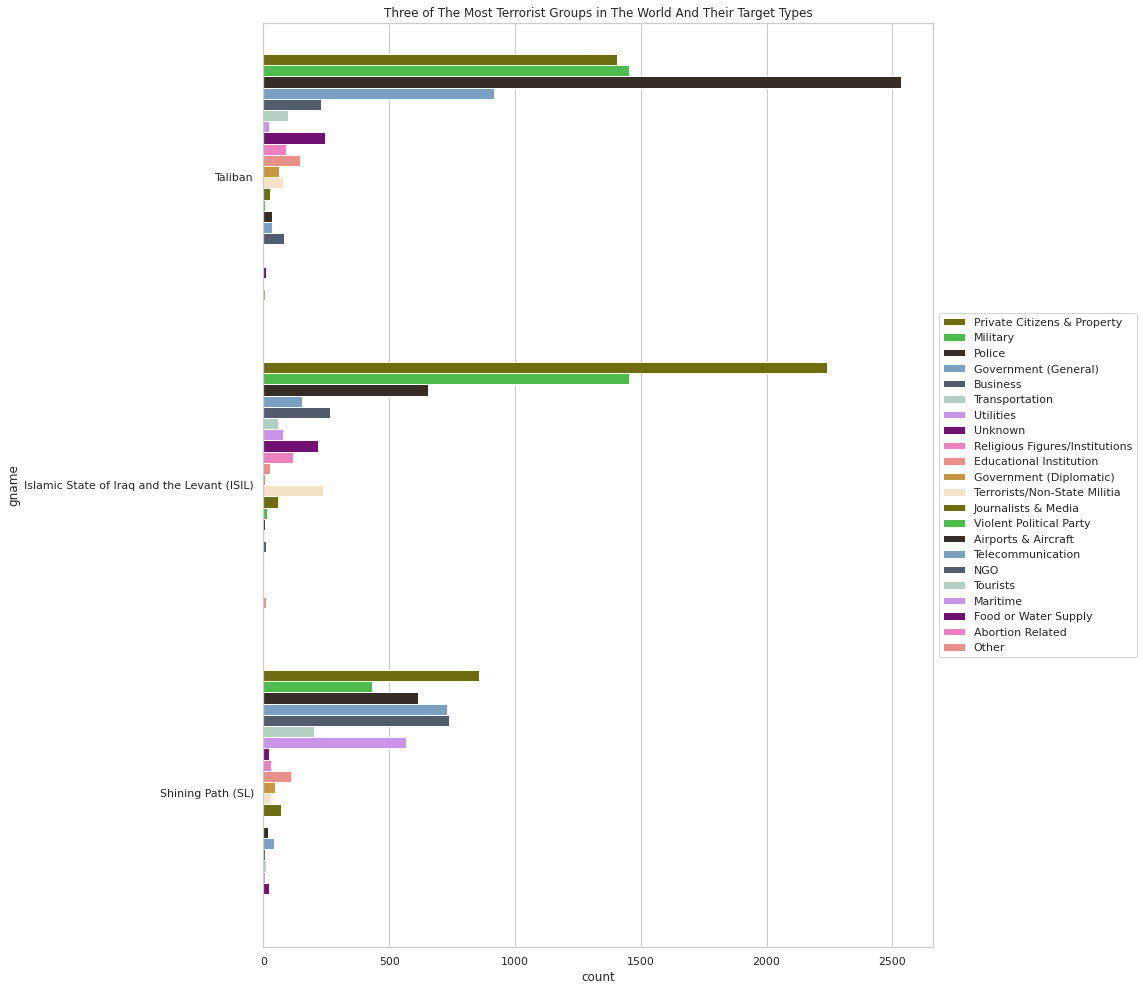

In [22]:
plt.figure(figsize=(12, 17))

ax = sns.countplot(data=groups_df, 
                   y="gname", 
                   hue="targtype1_txt",
                   palette = main_palette[::-1],
                   order=groups_df['gname'].value_counts().head(3).index,
                   hue_order=terror_df['targtype1_txt'].value_counts().index
).set(title='Three of The Most Terrorist Groups in The World And Their Target Types')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

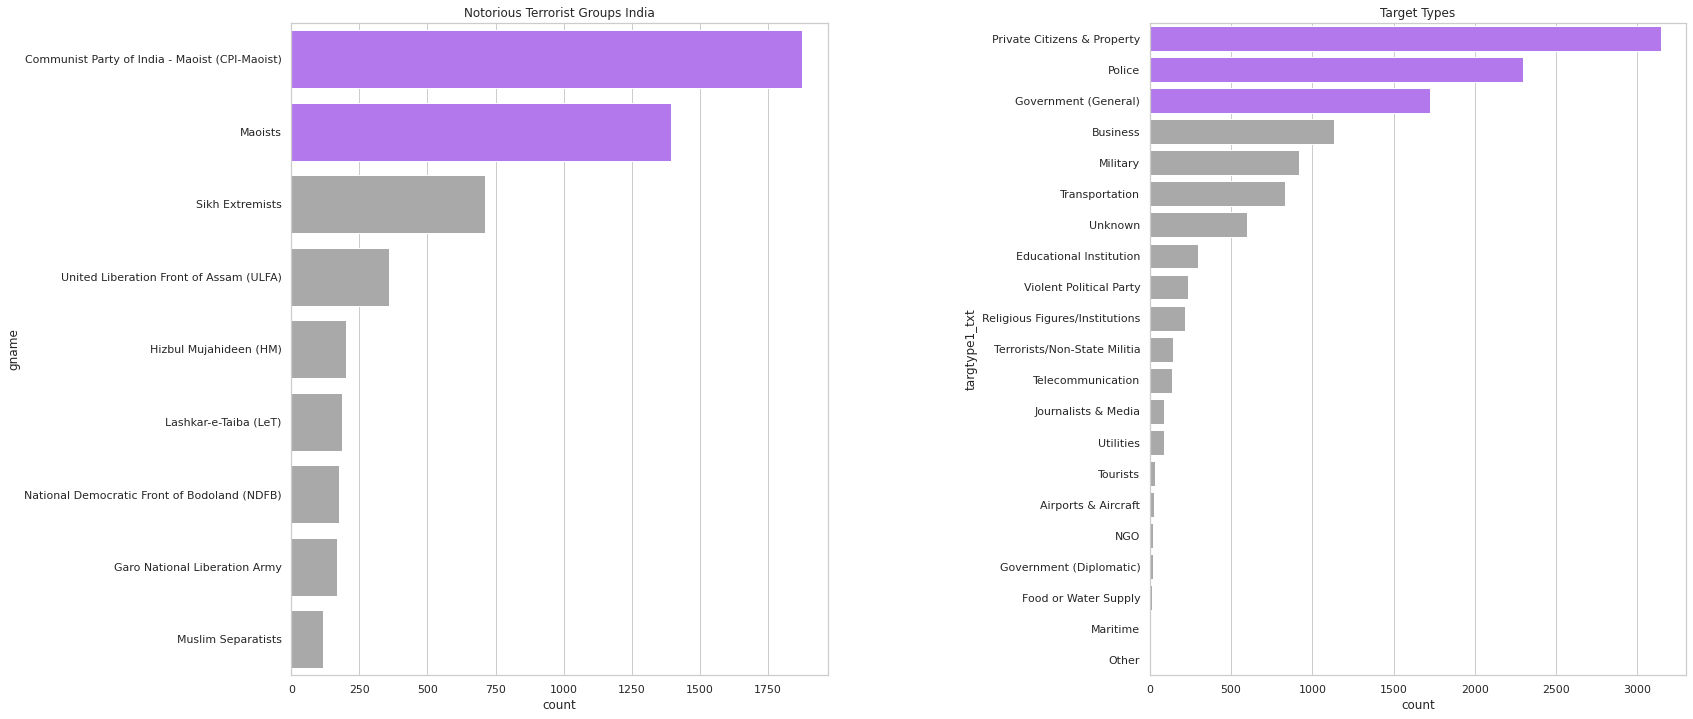

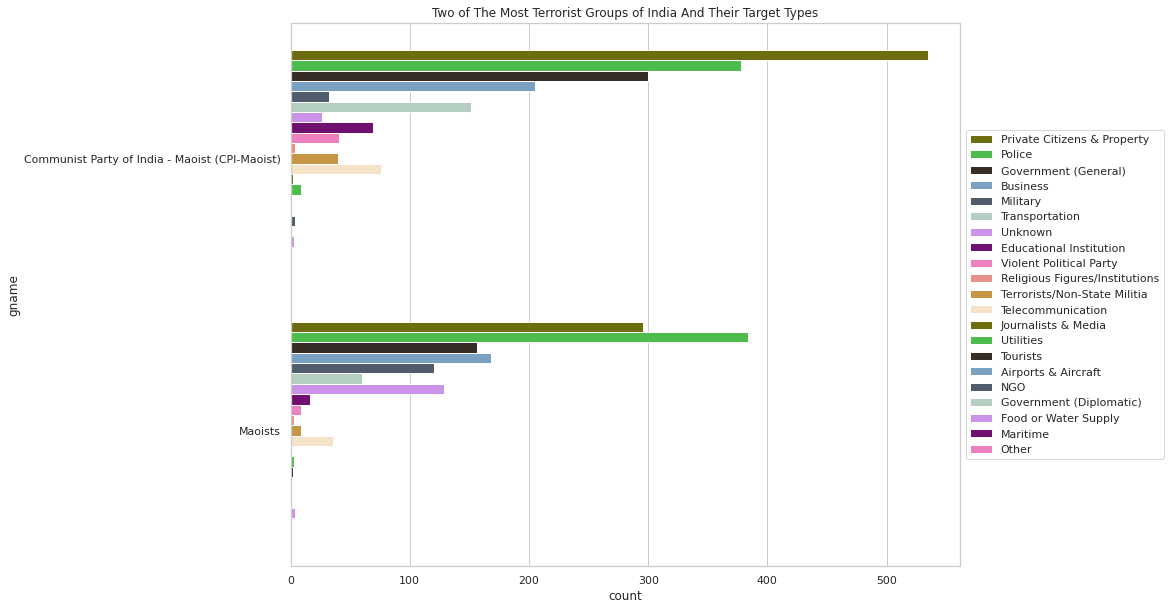

In [23]:
terror_india = terror_df[terror_df.country_txt == "India"]

f,ax = plt.subplots(1,2,figsize=(25,12))

terror_india_groups_df = terror_india[terror_india.gname.isin(terror_india['gname'].value_counts().head(10).index)]
terror_india_groups_df.drop(terror_india_groups_df[terror_india_groups_df.gname == "Unknown"].index, inplace=True)

vals = ["Communist Party of India - Maoist (CPI-Maoist)", "Maoists"]
palette = generate_palette(data=terror_india_groups_df, col="gname", vals_list=vals)

sns.countplot(data=terror_india_groups_df,
              y="gname",
              palette=palette,
              order=terror_india_groups_df['gname'].value_counts().index,
              ax=ax[0]
).set(title='Notorious Terrorist Groups India')

vals = ["Private Citizens & Property", "Police", "Government (General)"]
palette = generate_palette(data=terror_india, col="targtype1_txt", vals_list=vals)

sns.countplot(data=terror_india,
              y="targtype1_txt",
              palette=palette,
              order=terror_india['targtype1_txt'].value_counts().index,
              ax=ax[1]
).set(title='Target Types')

plt.subplots_adjust(hspace=0.3,wspace=0.6)
plt.show()

print()

plt.figure(figsize=(12, 10))

ax = sns.countplot(data=terror_india_groups_df, 
                   y="gname", 
                   hue="targtype1_txt",
                   palette = main_palette[::-1],
                   order=terror_india_groups_df['gname'].value_counts().head(2).index,
                   hue_order=terror_india['targtype1_txt'].value_counts().index
).set(title='Two of The Most Terrorist Groups of India And Their Target Types')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

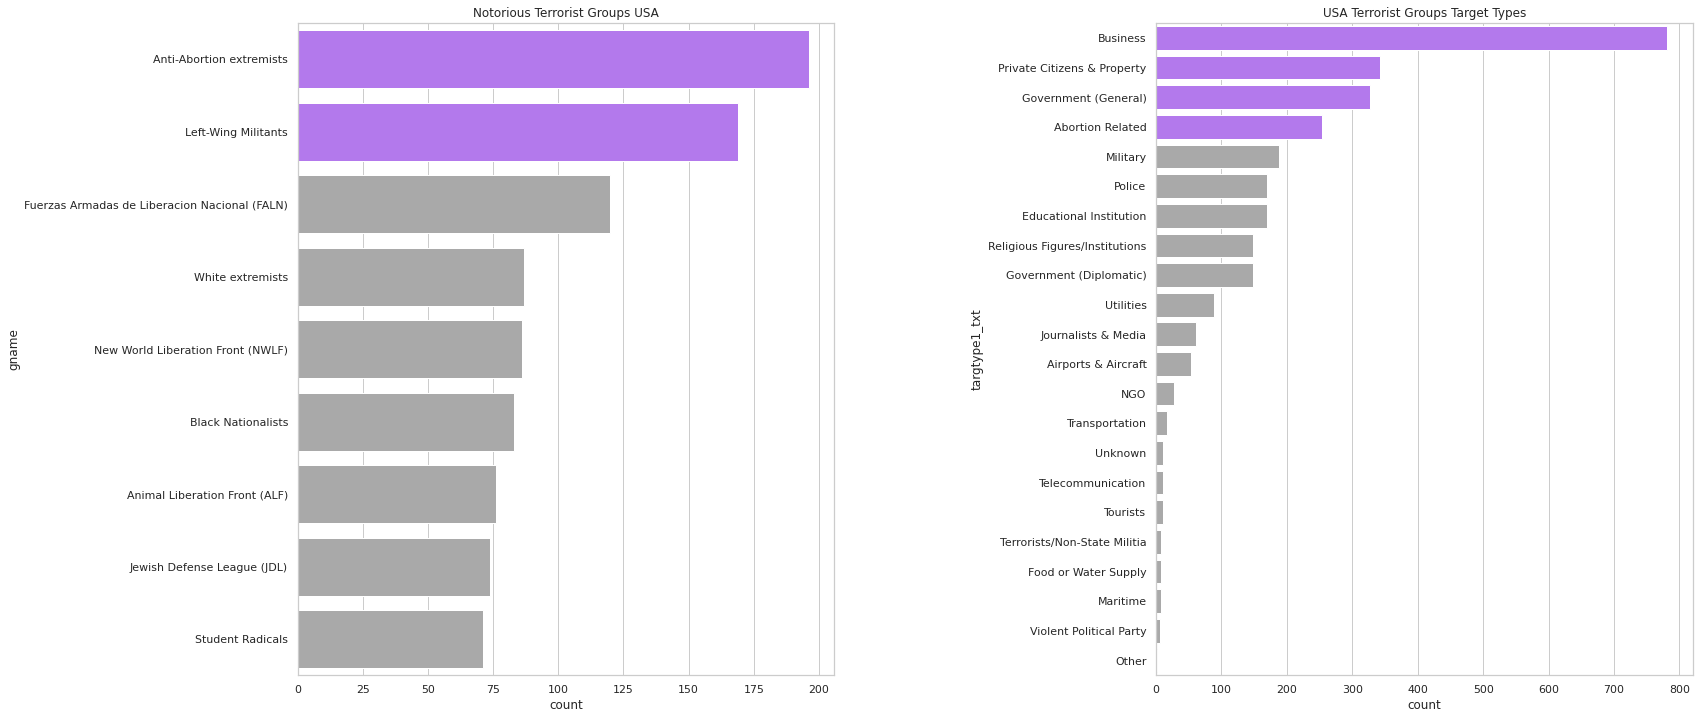

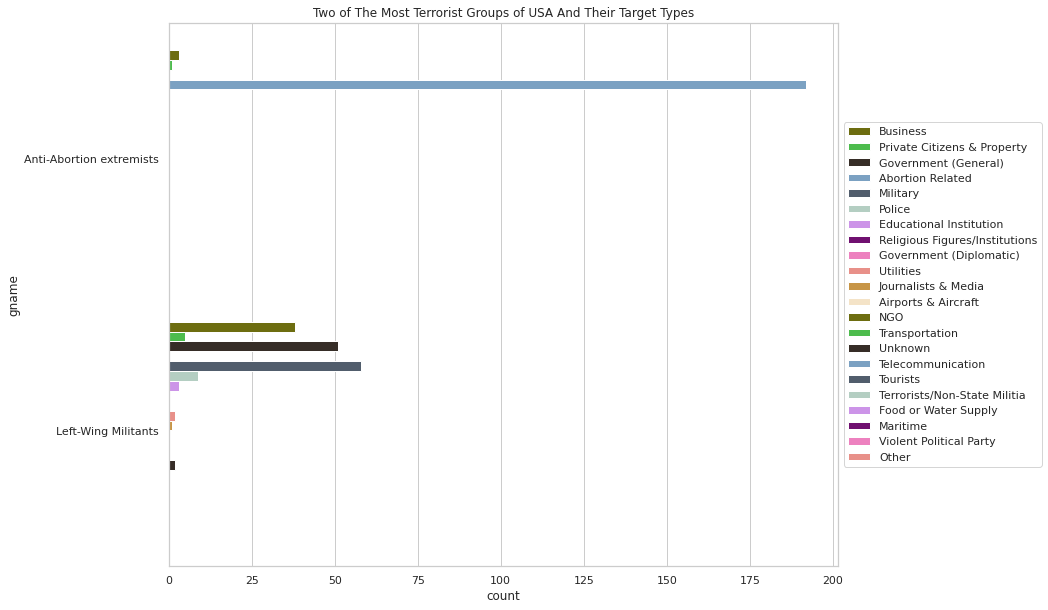

In [24]:
terror_usa = terror_df[terror_df.country_txt == "United States"]

f,ax = plt.subplots(1,2,figsize=(25,12))

terror_usa_groups_df = terror_usa[terror_usa.gname.isin(terror_usa['gname'].value_counts().head(10).index)]
terror_usa_groups_df.drop(terror_usa_groups_df[terror_usa_groups_df.gname == "Unknown"].index, inplace=True)

vals = ["Anti-Abortion extremists", "Left-Wing Militants"]
palette = generate_palette(data=terror_usa_groups_df, col="gname", vals_list=vals)

sns.countplot(data=terror_usa_groups_df,
              y="gname",
              palette=palette,
              order=terror_usa_groups_df['gname'].value_counts().index,
              ax=ax[0]
).set(title='Notorious Terrorist Groups USA')

vals = ["Business", "Private Citizens & Property", "Government (General)", "Abortion Related"]
palette = generate_palette(data=terror_usa, col="targtype1_txt", vals_list=vals)

sns.countplot(data=terror_usa,
              y="targtype1_txt",
              palette=palette,
              order=terror_usa['targtype1_txt'].value_counts().index,
              ax=ax[1]
).set(title='USA Terrorist Groups Target Types')

plt.subplots_adjust(hspace=0.3,wspace=0.6)
plt.show()

print()

plt.figure(figsize=(12, 10))

ax = sns.countplot(data=terror_usa_groups_df, 
                   y="gname", 
                   hue="targtype1_txt",
                   palette = main_palette[::-1],
                   order=terror_usa_groups_df['gname'].value_counts().head(2).index,
                   hue_order=terror_usa['targtype1_txt'].value_counts().index
)

ax.set(title='Two of The Most Terrorist Groups of USA And Their Target Types')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

## Casualties

In [25]:
countries = terror_df.country_txt.value_counts().head(10).index
country_mean_kills = []
for country in countries:
    country_mean_kills.append(terror_df.nkill[terror_df.country_txt == country].mean())

print('Average number of people killed per attack by Country :')
for i, country in enumerate(countries):
    print('{} : {}'.format(country, round(country_mean_kills[i],2)))
    
print()

countries = terror_df.country_txt.value_counts().index
country_mean_kills = []
for country in countries:
    country_mean_kills.append(terror_df.nkill[terror_df.country_txt == country].mean())

print('Highest no. of people killed in average per attack :')
for i, country in enumerate(countries):
    if country_mean_kills[i] == max(country_mean_kills) :
        print('{} : {}'.format(country, round(country_mean_kills[i],2)))

Average number of people killed per attack by Country :
Iraq : 3.19
Pakistan : 1.66
Afghanistan : 3.09
India : 1.62
Colombia : 1.77
Philippines : 1.38
Peru : 2.09
El Salvador : 2.27
United Kingdom : 0.65
Turkey : 1.6

Highest no. of people killed in average per attack :
South Vietnam : 81.0


## Hotspot for terrorism

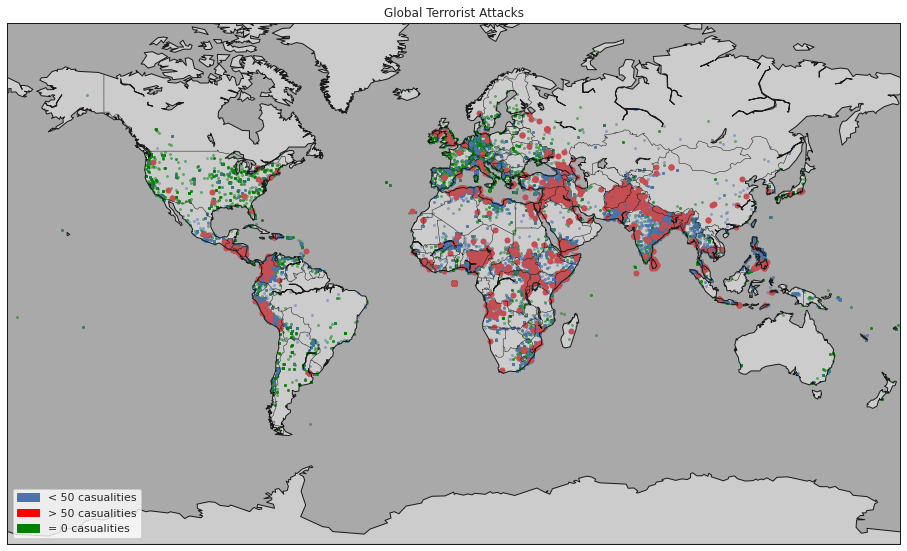

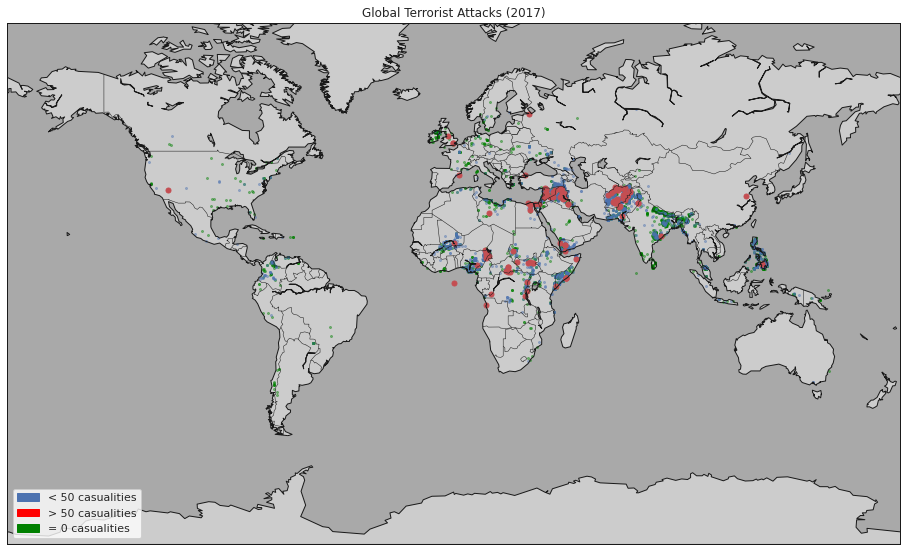

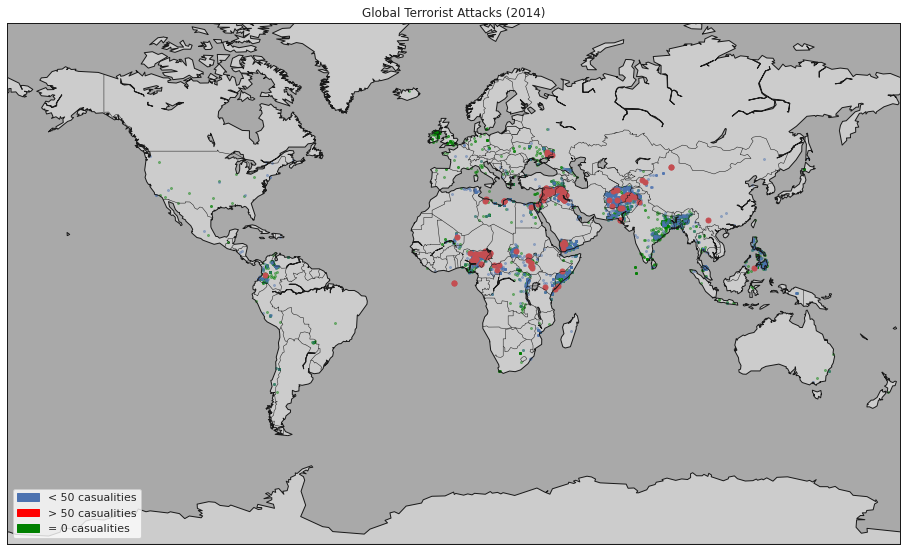

In [26]:
plt.figure(figsize=(12,8))
terror = terror_df.copy()
terror['casualities']=terror['nkill']+terror['nwound']
m3 = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c',lat_0=True,lat_1=True)

lat__=list(terror[terror['casualities']==0].latitude)
long__=list(terror[terror['casualities']==0].longitude)
x__,y__=m3(long__,lat__)
m3.plot(x__, y__,'go',markersize=2,color = 'green',alpha=0.4)

lat_=list(terror[(terror['casualities']>1) & (terror['casualities']<50)].latitude)
long_=list(terror[(terror['casualities']>1) & (terror['casualities']<50)].longitude)
x_,y_=m3(long_,lat_)
m3.plot(x_, y_,'go',markersize=2,color = 'b',alpha=0.4)

lat_100=list(terror[terror['casualities']>=50].latitude)
long_100=list(terror[terror['casualities']>=50].longitude)
x_100,y_100=m3(long_100,lat_100)
m3.plot(x_100, y_100,'go',markersize=5,color = 'r')

m3.drawcoastlines()
m3.drawcountries()
m3.fillcontinents(lake_color='darkgrey')
m3.drawmapboundary(fill_color='darkgrey')
fig=plt.gcf()
fig.set_size_inches(16,10)
plt.title('Global Terrorist Attacks')
plt.legend(loc='lower left',handles=[mpatches.Patch(color='b', label = "< 50 casualities"),
                                     mpatches.Patch(color='red',label='> 50 casualities'),
                                     mpatches.Patch(color='green',label='= 0 casualities'),])
plt.show()

plt.figure(figsize=(12,8))
terror = terror_df.copy()
terror['casualities']=terror['nkill']+terror['nwound']
m3 = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c',lat_0=True,lat_1=True)

lat__=list(terror[(terror['casualities']==0) & (terror["iyear"] == 2017)].latitude)
long__=list(terror[(terror['casualities']==0) & (terror["iyear"] == 2017)].longitude)
x__,y__=m3(long__,lat__)
m3.plot(x__, y__,'go',markersize=2,color = 'green',alpha=0.4)

lat_=list(terror[(terror['casualities']>1) & (terror['casualities']<50) & (terror["iyear"] == 2017)].latitude)
long_=list(terror[(terror['casualities']>1) & (terror['casualities']<50) & (terror["iyear"] == 2017)].longitude)
x_,y_=m3(long_,lat_)
m3.plot(x_, y_,'go',markersize=2,color = 'b',alpha=0.4)

lat_100=list(terror[(terror['casualities']>=50) & (terror["iyear"] == 2017)].latitude)
long_100=list(terror[(terror['casualities']>=50) & (terror["iyear"] == 2017)].longitude)
x_100,y_100=m3(long_100,lat_100)
m3.plot(x_100, y_100,'go',markersize=5,color = 'r')

m3.drawcoastlines()
m3.drawcountries()
m3.fillcontinents(lake_color='darkgrey')
m3.drawmapboundary(fill_color='darkgrey')
fig=plt.gcf()
fig.set_size_inches(16,10)
plt.title('Global Terrorist Attacks (2017)')
plt.legend(loc='lower left',handles=[mpatches.Patch(color='b', label = "< 50 casualities"),
                                     mpatches.Patch(color='red',label='> 50 casualities'),
                                     mpatches.Patch(color='green',label='= 0 casualities'),])
plt.show()

plt.figure(figsize=(12,8))
terror = terror_df.copy()
terror['casualities']=terror['nkill']+terror['nwound']
m3 = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c',lat_0=True,lat_1=True)

lat__=list(terror[(terror['casualities']==0) & (terror["iyear"] == 2014)].latitude)
long__=list(terror[(terror['casualities']==0) & (terror["iyear"] == 2014)].longitude)
x__,y__=m3(long__,lat__)
m3.plot(x__, y__,'go',markersize=2,color = 'green',alpha=0.4)

lat_=list(terror[(terror['casualities']>1) & (terror['casualities']<50) & (terror["iyear"] == 2014)].latitude)
long_=list(terror[(terror['casualities']>1) & (terror['casualities']<50) & (terror["iyear"] == 2014)].longitude)
x_,y_=m3(long_,lat_)
m3.plot(x_, y_,'go',markersize=2,color = 'b',alpha=0.4)

lat_100=list(terror[(terror['casualities']>=50) & (terror["iyear"] == 2014)].latitude)
long_100=list(terror[(terror['casualities']>=50) & (terror["iyear"] == 2014)].longitude)
x_100,y_100=m3(long_100,lat_100)
m3.plot(x_100, y_100,'go',markersize=5,color = 'r')

m3.drawcoastlines()
m3.drawcountries()
m3.fillcontinents(lake_color='darkgrey')
m3.drawmapboundary(fill_color='darkgrey')
fig=plt.gcf()
fig.set_size_inches(16,10)
plt.title('Global Terrorist Attacks (2014)')
plt.legend(loc='lower left',handles=[mpatches.Patch(color='b', label = "< 50 casualities"),
                                     mpatches.Patch(color='red',label='> 50 casualities'),
                                     mpatches.Patch(color='green',label='= 0 casualities'),])
plt.show()

#### Thank you for checking out my work 💜
#### Have a great day :)